# Actividad 5: Procesamiento de Texto

Después de su concierto en Brasil, el basado Viocente Domínguez y sus panitas brasileños quieren crear su propia _startup_, Vioexpress. 

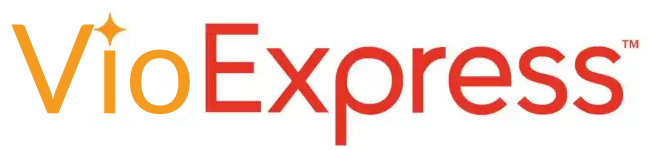

Para esto, necesita de tu ayuda para analizar las reseñas de la competencia, **Olist**, y así evaluar cuáles son los aspectos que los clientes considean más importantes al momento de evaluar una compra. 

## Librerías a utilizar

In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk import word_tokenize, RSLPStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Descargar datos

Para esta evaluación utilizaremos un *dataset* basado en las *reviews* de Olist, un *eCommerce* Brasileño. 

El *dataset* contiene la siguiente información:
* `review_comment_message` que indica el contenido de la *review*, y
* `review_score` que indica el puntaje asociado a la *review*

In [2]:
!wget -O reviews.csv 'https://docs.google.com/spreadsheets/d/1LmDWZk3y5jksFQhZhtwCGTeap6xqPEzF0yasLSNj6Ic/export?gid=1492652439&format=csv'

Especificaci¢n de unidad no v lida.


"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Además, para poder utilizar lo métodos de la librería `NLTK`, debemos descargar los siguientes datos.

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Rod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

## Cargar datos

In [6]:
reviews = pd.read_csv('reviews.csv')
reviews

,review_score,review_comment_message
0,1,Zero responsabilidade
1,1,Zero não entregaram e não dão satisfação! Vou ...
2,1,Zero
3,1,vou terminar de pagar a mercadoria e não receb...
4,1,"vou registrar queixa no reclameaqui porque, ap..."
...,...,...
40786,5,\nrecomendo
40787,5,\nEu adoro comprar na lannister na loja Americ...
40788,5,\nEntrega rápida.
40789,5,\nBoa\nDemais\nA entrega\n


In [7]:
X = reviews.review_comment_message
y = reviews.review_score

## Preprocesamiento

### 1. Tokenización de frases (0.7 puntos)

El primer paso para preprocesar los datos consiste en tokenizar las reseñas, es decir, separar todos los elementos de un textos.

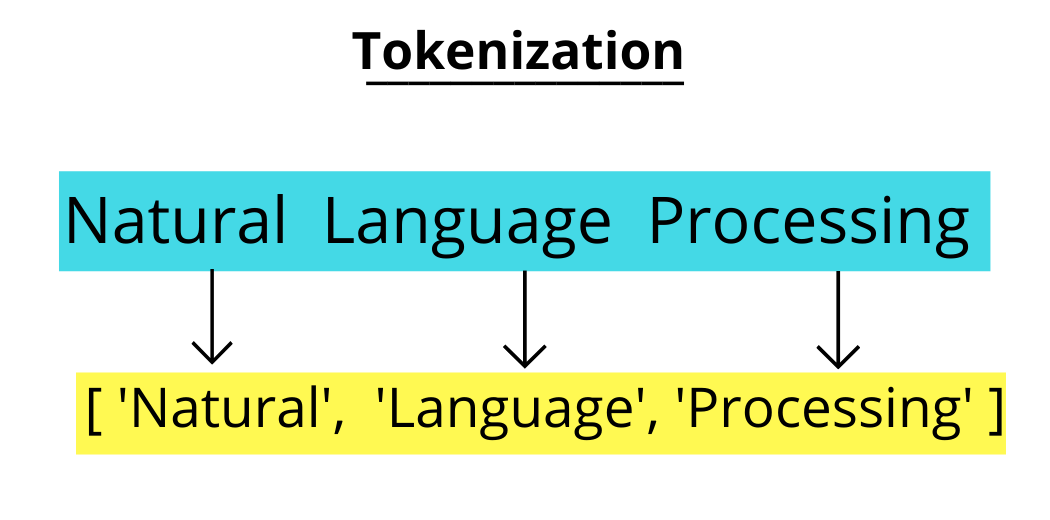

Para esto debemos aplicar el método `word_tokenize` al comentario de cada _review_ (`X`).

In [20]:
X_tokenized = [word_tokenize(comment) for comment in X]
X_tokenized

[['Zero', 'responsabilidade'],
 ['Zero',
  'não',
  'entregaram',
  'e',
  'não',
  'dão',
  'satisfação',
  '!',
  'Vou',
  'devolver'],
 ['Zero'],
 ['vou',
  'terminar',
  'de',
  'pagar',
  'a',
  'mercadoria',
  'e',
  'não',
  'recebi',
  ',',
  'muito',
  'insatisfeito',
  'com',
  'a',
  'compra',
  '.'],
 ['vou',
  'registrar',
  'queixa',
  'no',
  'reclameaqui',
  'porque',
  ',',
  'apesar',
  'de',
  'informar',
  'que',
  ',',
  'me',
  'enviaram',
  'produto',
  'para',
  'tensao',
  'errada',
  '(',
  'pedi',
  '110V',
  'e',
  'mandaram',
  '220V',
  ')',
  'apresentei',
  'reclamaçao',
  'e',
  'nao',
  'me',
  'deram',
  'satisfaçao'],
 ['vou', 'receber', 'ainda', '?', 'Como', 'fica', 'o', 'pagamento', '?'],
 ['Vou',
  'me',
  'casar',
  'e',
  'comprei',
  'vários',
  'produtos',
  'nas',
  'lojas',
  'lannister',
  'e',
  'só',
  'está',
  'dando',
  'problema',
  'até',
  'agora',
  'não',
  'chegou',
  '!'],
 ['Vou',
  'mandar',
  'o',
  'produto',
  'de',
  'volt

### 2. Remover *stopwords* y puntución (0.7 puntos)

Una vez que hayamos tokenizado las frases, debemos eliminar todas las _stopwords_ presenten en las frases, ya que estos son elementos que generan ruido en el análisis. 

Para lograr lo anterior, debemos eliminar de las frases tokenizadas todas las palabras que se encuentren presentes en la lista `pg_stopwords` y todos los caracteres especiales.

In [32]:
pg_stopwords = stopwords.words("portuguese")

X_removed = [[word for word in x if word not in pg_stopwords] for x in X_tokenized]
X_removed

[['Zero', 'responsabilidade'],
 ['Zero', 'entregaram', 'dão', 'satisfação', '!', 'Vou', 'devolver'],
 ['Zero'],
 ['vou',
  'terminar',
  'pagar',
  'mercadoria',
  'recebi',
  ',',
  'insatisfeito',
  'compra',
  '.'],
 ['vou',
  'registrar',
  'queixa',
  'reclameaqui',
  'porque',
  ',',
  'apesar',
  'informar',
  ',',
  'enviaram',
  'produto',
  'tensao',
  'errada',
  '(',
  'pedi',
  '110V',
  'mandaram',
  '220V',
  ')',
  'apresentei',
  'reclamaçao',
  'nao',
  'deram',
  'satisfaçao'],
 ['vou', 'receber', 'ainda', '?', 'Como', 'fica', 'pagamento', '?'],
 ['Vou',
  'casar',
  'comprei',
  'vários',
  'produtos',
  'lojas',
  'lannister',
  'dando',
  'problema',
  'agora',
  'chegou',
  '!'],
 ['Vou',
  'mandar',
  'produto',
  'volta',
  '.',
  'Estou',
  'esperando',
  'andamento',
  'solicitação',
  'devolução',
  'fiz',
  'stark',
  '.'],
 ['Vou',
  'mandar',
  'produto',
  'volta',
  '.',
  'Estou',
  'esperando',
  'andamento',
  'solicitação',
  'devolução',
  'fiz',
 

### 3. _Stemming_ (0.7 puntos)

Ahora que las frases ya no contienen _stopwords_, queda reducir las palabras a su raiz para así poder asociar todas las palabras de un mismo grupos. 

Para esto, debemos aplicar el método `snowball.stem()` a cada palabra de cada frase obtenida en el paso anterior.

In [33]:
snowball = SnowballStemmer("portuguese")

X_stemmed = [[snowball.stem(word) for word in x] for x in X_removed]
X_stemmed

[['zer', 'respons'],
 ['zer', 'entreg', 'dã', 'satisf', '!', 'vou', 'devolv'],
 ['zer'],
 ['vou',
  'termin',
  'pag',
  'mercador',
  'receb',
  ',',
  'insatisfeit',
  'compr',
  '.'],
 ['vou',
  'registr',
  'queix',
  'reclameaqu',
  'porqu',
  ',',
  'apes',
  'inform',
  ',',
  'envi',
  'produt',
  'tensa',
  'errad',
  '(',
  'ped',
  '110v',
  'mand',
  '220v',
  ')',
  'apresent',
  'reclamaça',
  'nao',
  'der',
  'satisfaça'],
 ['vou', 'receb', 'aind', '?', 'com', 'fic', 'pagament', '?'],
 ['vou',
  'cas',
  'compr',
  'vári',
  'produt',
  'loj',
  'lannist',
  'dand',
  'problem',
  'agor',
  'cheg',
  '!'],
 ['vou',
  'mand',
  'produt',
  'volt',
  '.',
  'estou',
  'esper',
  'andament',
  'solicit',
  'devolu',
  'fiz',
  'stark',
  '.'],
 ['vou',
  'mand',
  'produt',
  'volt',
  '.',
  'estou',
  'esper',
  'andament',
  'solicit',
  'devolu',
  'fiz',
  'stark',
  '.'],
 ['vou',
  'entrar',
  'contat',
  'loj',
  '.ach',
  'maquin',
  'vei',
  'defeito.po',
  'pres

### 4. Lematización

Otra forma de agrupar las palabras es obtener el _lemma_ de cada una de ellas. Lamentablemente la librería `NLTK` no cuentan con una adaptación de este métordo al portugués, pero otras libreías como `spaCy` sí cuentan con esta implementación.

### 5. Vectorización (0.7 puntos)

Una vez aplicado el _stemming_, podemos vectorizar las frases. Para realizar esta acción, se debe utilizar el método `fit_transform` de la clase `CountVectorizer` y entregarle las frases preprocesadas.

**IMPORTANTE:** Para que el método funcione corractemente se le debe entregar cada frase como un string donde todas las palabras estén separadas por un espacio (`' '`).

In [46]:
count_vect = CountVectorizer(lowercase=True)

X_vector = count_vect.fit_transform([" ".join(x) for x in X_stemmed]).toarray()
X_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 6. Transformación a tf-idf (0.7 puntos)

Finalmente, para poder utilizar estos datos para entrenar un modelo, aplicaremos una transformación tf-idf.
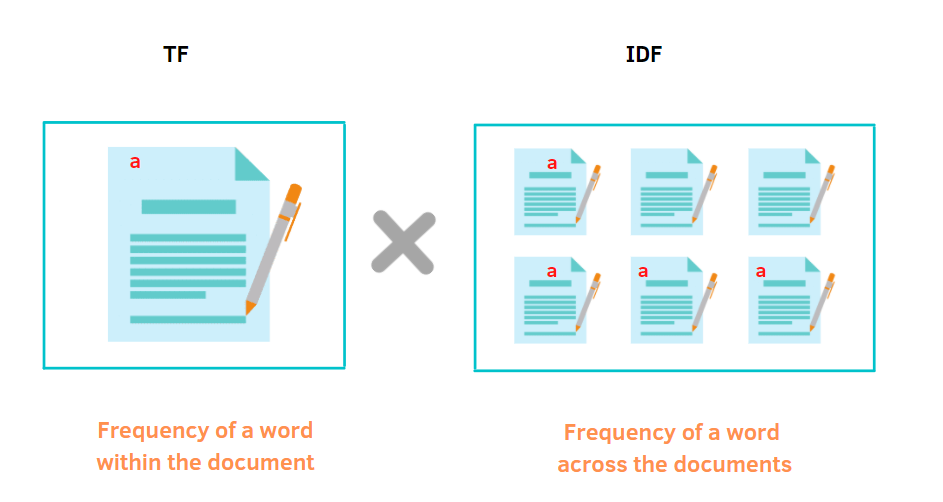

Para esto, se deberá hacer `fit` a la instancia de la clase `TfidfTransformer` y posteriormente aplicar `transform` a los datos.

**IMPORTANTE:** Tanto como para el `fit` como para el `transform` deberás utilizar los datos obtenidos en el paso anterior.

In [47]:
tf_transformer = TfidfTransformer(use_idf=True)

tf_transformer = tf_transformer.fit(X_vector)
X_tfidf = tf_transformer.transform(X_vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---

## Clasificación

Ahora que hemos terminado de preprocesar los datos, procederemos a entrenar un modelo y a predecir la clasificación de algunas _reviews_.

### 1. Separar el dataset en train y test

En primera instancia debemos separar nuestro dataset en un set de entrenamiento y testeo.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y)

### 2. Entrenar el Modelo (1.5 punto)

A continuación procederemos a entrenar distintos modelos para ver cómo se comportan con los datos obtenidos anteriormente.

En cada caso entrena el modelo correspondiente y utiliza el método `classification_report` para obtener las métricas de clasificación.

#### a) KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)

neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           1       0.30      0.65      0.41      1008
           2       0.03      0.34      0.05        41
           3       0.04      0.22      0.06       148
           4       0.10      0.23      0.14       692
           5       0.92      0.57      0.70      8309

    accuracy                           0.55     10198
   macro avg       0.28      0.40      0.27     10198
weighted avg       0.79      0.55      0.62     10198



#### b) Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)
preds = forest.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           1       0.88      0.60      0.72      3196
           2       0.03      0.30      0.06        57
           3       0.07      0.31      0.11       188
           4       0.08      0.35      0.12       316
           5       0.93      0.74      0.82      6441

    accuracy                           0.67     10198
   macro avg       0.40      0.46      0.37     10198
weighted avg       0.87      0.67      0.75     10198



#### c) MPL

**NOTA:** Les recomendamos no aumentar la cantidad máxima de iteraciones, ya que por la cantidad de columans del dataset el algoritmo puede demorar demasiado tiempo en entrenar.

In [58]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=10)

mlp_clf.fit(X_train, y_train)
preds = mlp_clf.predict(X_test)
print(classification_report(preds, y_test))

c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.79      0.66      0.72      2612
           2       0.08      0.14      0.10       284
           3       0.15      0.27      0.20       494
           4       0.14      0.33      0.19       630
           5       0.92      0.76      0.83      6178

    accuracy                           0.66     10198
   macro avg       0.41      0.43      0.41     10198
weighted avg       0.77      0.66      0.71     10198



### 3. Cambiar los *labels* a predecir (1 punto)

Como lo habrás notado, los modelos no tienen un buen desempeño al predecir el puntaje exacto de la reseña entre 1 y 5. Prueba reduciendo estas clases a 2, donde si el puntaje es menor o igual a 3 diremos que la reseña es `'mala'` y si es mayor a 3 diremos que es `'buena'`.

In [63]:
new_y_train = [0 if (y <= 3) else 1 for y in y_train]
new_y_test  = [0 if (y <= 3) else 1 for y in y_test]

Ahora, entrena uno de los modelos anteriores y obtén su `classification_report`

In [64]:
forest = RandomForestClassifier()

forest.fit(X_train, new_y_train)
preds = forest.predict(X_test)

print(classification_report(preds, new_y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3592
           1       0.91      0.91      0.91      6606

    accuracy                           0.88     10198
   macro avg       0.87      0.87      0.87     10198
weighted avg       0.88      0.88      0.88     10198



Compara ambos resultados. ¿Por qué crees que se deba esta mejora?

Respuesta: La mejora se debe a la reducción de dimensionalidad del espacio de salida sumado al hecho de que estas dos nuevas clases tienen más muestras de las cuales aprender a diferencia de cuando estaban separadas en 5 clases. Todo esto en conjunto ayuda al modelo a aprender de manera más fácil.